In [1]:
#Step 1: Find and download a dataset. Here are some potential places to look
import pandas as pd
import numpy as np
employee_data = pd.read_csv("Employee_attrition.csv")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [83]:
# Step 2: Divide into a training set and a testing set. In a Jupyter notebook, use scikitlearn to divide you data into training and testing sets. Make sure that the testing and training sets are balanced in terms of target classes

In [2]:
# features = employee_data_dummies[['Attrition','Department', 'Gender', 'JobRole', 'MaritalStatus']]
#features = employee_data_dummies.loc[10:12]

# Extract NumPy arrays
X = employee_data.drop(['Attrition', 'Over18', 'MonthlyRate','EducationField', 'BusinessTravel', 'EmployeeCount', 'EmployeeNumber', 'OverTime', 'StockOptionLevel'],axis=1)
print(X)
y = employee_data['Attrition'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

      Age  DailyRate              Department  DistanceFromHome  Education  \
0      41       1102                   Sales                 1          2   
1      49        279  Research & Development                 8          1   
2      37       1373  Research & Development                 2          2   
3      33       1392  Research & Development                 3          4   
4      27        591  Research & Development                 2          1   
...   ...        ...                     ...               ...        ...   
1465   36        884  Research & Development                23          2   
1466   39        613  Research & Development                 6          1   
1467   27        155  Research & Development                 4          3   
1468   49       1023                   Sales                 2          3   
1469   34        628  Research & Development                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel

In [3]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
X_train.info()
print(y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 944 to 684
Data columns (total 26 columns):
Age                         1102 non-null int64
DailyRate                   1102 non-null int64
Department                  1102 non-null object
DistanceFromHome            1102 non-null int64
Education                   1102 non-null int64
EnvironmentSatisfaction     1102 non-null int64
Gender                      1102 non-null object
HourlyRate                  1102 non-null int64
JobInvolvement              1102 non-null int64
JobLevel                    1102 non-null int64
JobRole                     1102 non-null object
JobSatisfaction             1102 non-null int64
MaritalStatus               1102 non-null object
MonthlyIncome               1102 non-null int64
NumCompaniesWorked          1102 non-null int64
PercentSalaryHike           1102 non-null int64
PerformanceRating           1102 non-null int64
RelationshipSatisfaction    1102 non-null int64
StandardHours           

In [90]:
# Step 3: Explore your training set. In a Jupyter notebook, import your data into a Pandas data frame and use the following pandas functions to explore your data


In [100]:
pd.DataFrame(X_train)


,Age,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
944,28,1476,Research & Development,1,3,3,Female,55,1,2,...,3,1,80,10,6,3,9,8,7,5
1402,31,1276,Research & Development,2,1,4,Female,59,1,1,...,3,3,80,1,4,3,1,0,0,0
1054,49,1490,Research & Development,7,4,3,Male,35,3,3,...,3,2,80,29,3,3,8,7,0,7
1128,36,1302,Research & Development,6,4,1,Male,80,4,2,...,3,4,80,9,3,3,3,2,0,2
1323,28,280,Human Resources,1,2,3,Male,43,3,1,...,3,2,80,3,2,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,1333,Sales,10,4,3,Female,87,3,1,...,3,4,80,1,2,3,1,1,0,0
835,35,528,Human Resources,8,4,3,Male,100,3,1,...,3,2,80,6,2,1,5,4,1,4
1216,43,1179,Sales,2,3,4,Male,73,3,2,...,3,1,80,10,3,3,10,9,8,8
559,38,268,Research & Development,2,5,4,Male,92,3,1,...,3,2,80,6,0,1,1,0,0,1


In [101]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 944 to 684
Data columns (total 26 columns):
Age                         1102 non-null int64
DailyRate                   1102 non-null int64
Department                  1102 non-null object
DistanceFromHome            1102 non-null int64
Education                   1102 non-null int64
EnvironmentSatisfaction     1102 non-null int64
Gender                      1102 non-null object
HourlyRate                  1102 non-null int64
JobInvolvement              1102 non-null int64
JobLevel                    1102 non-null int64
JobRole                     1102 non-null object
JobSatisfaction             1102 non-null int64
MaritalStatus               1102 non-null object
MonthlyIncome               1102 non-null int64
NumCompaniesWorked          1102 non-null int64
PercentSalaryHike           1102 non-null int64
PerformanceRating           1102 non-null int64
RelationshipSatisfaction    1102 non-null int64
StandardHours           

In [102]:
pd.DataFrame(X_train).describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,...,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.00000,1102.000000,1102.000000,1102.000000,1102.000000
mean,36.823049,804.224138,9.109800,2.930127,2.749546,65.257713,2.727768,2.058984,2.733212,6480.078947,...,3.149728,2.698730,80.0,11.174229,2.768603,2.76225,6.964610,4.179673,2.166062,4.065336
std,9.024263,407.496329,8.087269,1.003907,1.097795,20.387544,0.717202,1.105336,1.095596,4722.585465,...,0.356966,1.084101,0.0,7.742950,1.253512,0.71427,6.101147,3.620813,3.198633,3.530495
min,18.000000,104.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,462.500000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2890.500000,...,3.000000,2.000000,80.0,6.000000,2.000000,2.00000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,808.000000,7.000000,3.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4850.500000,...,3.000000,3.000000,80.0,10.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000
75%,42.750000,1162.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8389.250000,...,3.000000,4.000000,80.0,15.000000,3.000000,3.00000,9.000000,7.000000,2.750000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,80.0,40.000000,6.000000,4.00000,40.000000,18.000000,15.000000,17.000000


In [104]:
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 1 columns):
0    1102 non-null float64
dtypes: float64(1)
memory usage: 8.7 KB


In [105]:
pd.DataFrame(y_train).describe()

,0
count,1102.000000
mean,0.162432
std,0.369014
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [103]:
# Step 4: Data cleaning. Address any missing values in your training set. Include the code in your Jupyter notebook and create a second, cleaned, version of your dataset. Then apply the same procedure to you test set (if you are putting in replacement values use IMPUTER in scikitlearn).

In [21]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
y_train = ordinal_encoder.fit_transform(y_train.reshape(-1, 1))
print(y_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [22]:
y_test = ordinal_encoder.fit_transform(y_test.reshape(-1, 1))
print(y_test)

[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.

In [62]:
# Do the Encoding for the Labels of "Type" 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
type_le = LabelEncoder()
type_labels = type_le.fit_transform(X['Department'])
X['Department_labels'] = type_labels
type_creation = OneHotEncoder()
label_feature_arr = type_creation.fit_transform(
                              X[['Department_labels']]).toarray()
gen_feature_labels = list(type_le.classes_)
generation_with_features_department = pd.DataFrame(label_feature_arr, 
                            columns=gen_feature_labels)
print(generation_with_features_department)



      Human Resources  Research & Development  Sales
0                 0.0                     0.0    1.0
1                 0.0                     1.0    0.0
2                 0.0                     1.0    0.0
3                 0.0                     1.0    0.0
4                 0.0                     1.0    0.0
...               ...                     ...    ...
1465              0.0                     1.0    0.0
1466              0.0                     1.0    0.0
1467              0.0                     1.0    0.0
1468              0.0                     0.0    1.0
1469              0.0                     1.0    0.0

[1470 rows x 3 columns]


C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [63]:
# Do the Encoding for the Labels of "Type" 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
type_le = LabelEncoder()
type_labels = type_le.fit_transform(X['Gender'])
X['Gender_labels'] = type_labels
type_creation = OneHotEncoder()
label_feature_arr = type_creation.fit_transform(
                              X[['Gender_labels']]).toarray()
gen_feature_labels = list(type_le.classes_)
generation_with_features_gender = pd.DataFrame(label_feature_arr, 
                            columns=gen_feature_labels)
print(generation_with_features_gender)


      Female  Male
0        1.0   0.0
1        0.0   1.0
2        0.0   1.0
3        1.0   0.0
4        0.0   1.0
...      ...   ...
1465     0.0   1.0
1466     0.0   1.0
1467     0.0   1.0
1468     0.0   1.0
1469     0.0   1.0

[1470 rows x 2 columns]


C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [64]:
# Do the Encoding for the Labels of "Type" 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
type_le = LabelEncoder()
type_labels = type_le.fit_transform(X['JobRole'])
X['JobRole'] = type_labels
type_creation = OneHotEncoder()
label_feature_arr = type_creation.fit_transform(
                              X[['JobRole']]).toarray()
gen_feature_labels = list(type_le.classes_)
generation_with_features_jobrole = pd.DataFrame(label_feature_arr, 
                            columns=gen_feature_labels)
print(generation_with_features_jobrole)


      Healthcare Representative  Human Resources  Laboratory Technician  \
0                           0.0              0.0                    0.0   
1                           0.0              0.0                    0.0   
2                           0.0              0.0                    1.0   
3                           0.0              0.0                    0.0   
4                           0.0              0.0                    1.0   
...                         ...              ...                    ...   
1465                        0.0              0.0                    1.0   
1466                        1.0              0.0                    0.0   
1467                        0.0              0.0                    0.0   
1468                        0.0              0.0                    0.0   
1469                        0.0              0.0                    1.0   

      Manager  Manufacturing Director  Research Director  Research Scientist  \
0         0.0      

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [65]:
# Do the Encoding for the Labels of "Type" 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
type_le = LabelEncoder()
type_labels = type_le.fit_transform(X['MaritalStatus'])
X['MaritalStatus'] = type_labels
type_creation = OneHotEncoder()
label_feature_arr = type_creation.fit_transform(
                              X[['MaritalStatus']]).toarray()
gen_feature_labels = list(type_le.classes_)
generation_with_features_MaritalStatus = pd.DataFrame(label_feature_arr, 
                            columns=gen_feature_labels)
print(generation_with_features_MaritalStatus)


      Divorced  Married  Single
0          0.0      0.0     1.0
1          0.0      1.0     0.0
2          0.0      0.0     1.0
3          0.0      1.0     0.0
4          0.0      1.0     0.0
...        ...      ...     ...
1465       0.0      1.0     0.0
1466       0.0      1.0     0.0
1467       0.0      1.0     0.0
1468       0.0      1.0     0.0
1469       0.0      1.0     0.0

[1470 rows x 3 columns]


C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [69]:
label_dataframes = pd.concat([generation_with_features_department, generation_with_features_gender, generation_with_features_jobrole, generation_with_features_MaritalStatus ], axis = 1)
print(label_dataframes)

      Human Resources  Research & Development  Sales  Female  Male  \
0                 0.0                     0.0    1.0     1.0   0.0   
1                 0.0                     1.0    0.0     0.0   1.0   
2                 0.0                     1.0    0.0     0.0   1.0   
3                 0.0                     1.0    0.0     1.0   0.0   
4                 0.0                     1.0    0.0     0.0   1.0   
...               ...                     ...    ...     ...   ...   
1465              0.0                     1.0    0.0     0.0   1.0   
1466              0.0                     1.0    0.0     0.0   1.0   
1467              0.0                     1.0    0.0     0.0   1.0   
1468              0.0                     0.0    1.0     0.0   1.0   
1469              0.0                     1.0    0.0     0.0   1.0   

      Healthcare Representative  Human Resources  Laboratory Technician  \
0                           0.0              0.0                    0.0   
1        

In [23]:
#print("Original features:\n", list(X.columns), "\n")
#X_dummies = pd.get_dummies(X)
#print("Features after get_dummies:\n", list(X_dummies.columns))
#ultimately, decided to go with OHE because the dummy variables kept problems with other code

Original features:
 ['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Features after get_dummies:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Department_Human Resources', 'Department_Res

In [25]:
#display(X_dummies.head())

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


In [49]:
#X = pd.concat ([X, X_dummies], axis=1)
#X.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,Sales,1,2,2,Female,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,279,Research & Development,8,1,3,Male,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,Research & Development,2,2,4,Male,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,Research & Development,3,4,4,Female,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,591,Research & Development,2,1,1,Male,40,3,1,...,1,0,0,0,0,0,0,0,1,0


In [66]:
#task = employee_data.corr()
#task.JobRole
employee_data.JobRole
#here is an example where the dummy variables did not work

0                 Sales Executive
1              Research Scientist
2           Laboratory Technician
3              Research Scientist
4           Laboratory Technician
                  ...            
1465        Laboratory Technician
1466    Healthcare Representative
1467       Manufacturing Director
1468              Sales Executive
1469        Laboratory Technician
Name: JobRole, Length: 1470, dtype: object

In [26]:
## or you can generally check if you have any empty elements in your dataframe (and thus whether you need to run Imputer)

employee_data.isnull().values.any()

False

In [ ]:
#Step 5: Visualize the data in your training set. At a minimum, use the following pandas functions to visualize the data in your Jupyter notebook.

#DataFrame.hist
#plotting.scatter_matrix()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252B82CBDC8>,
      dtype=object)

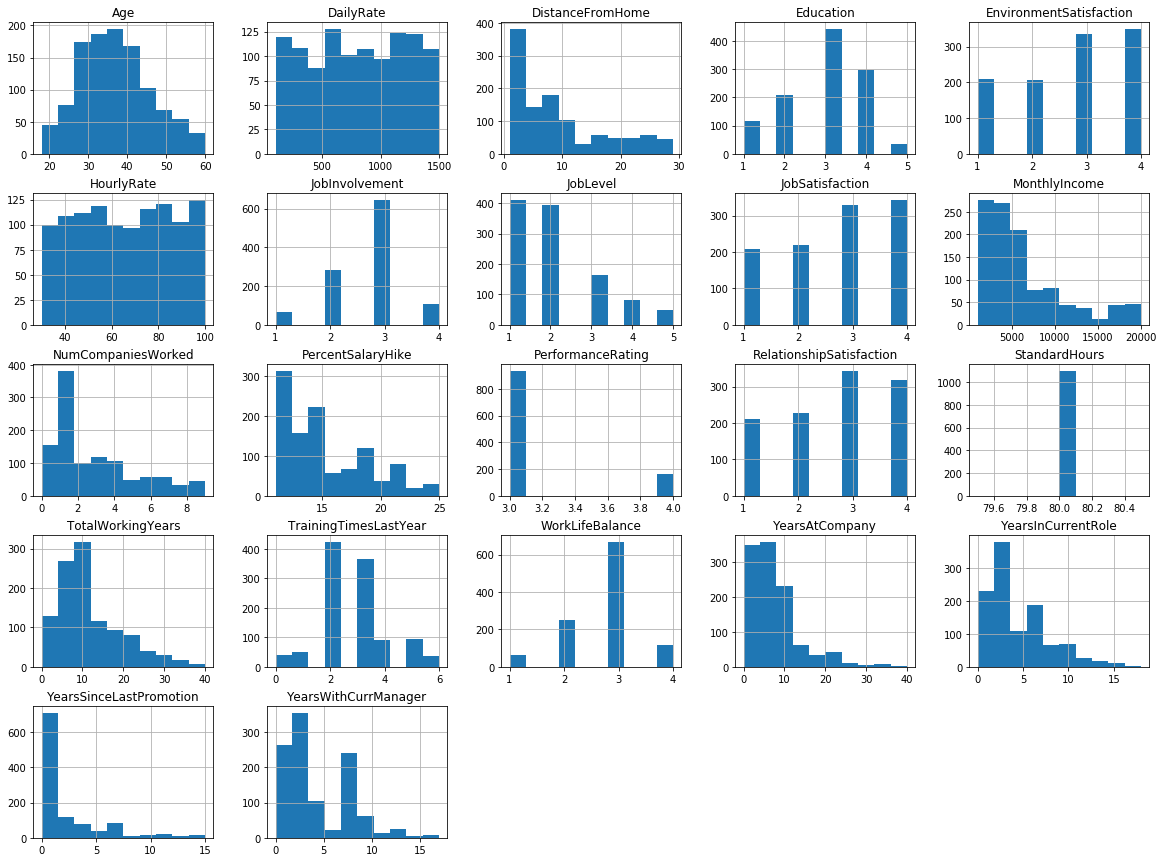

In [107]:
pd.DataFrame(X_train).hist(figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252D79E76C8>,
      dtype=object)

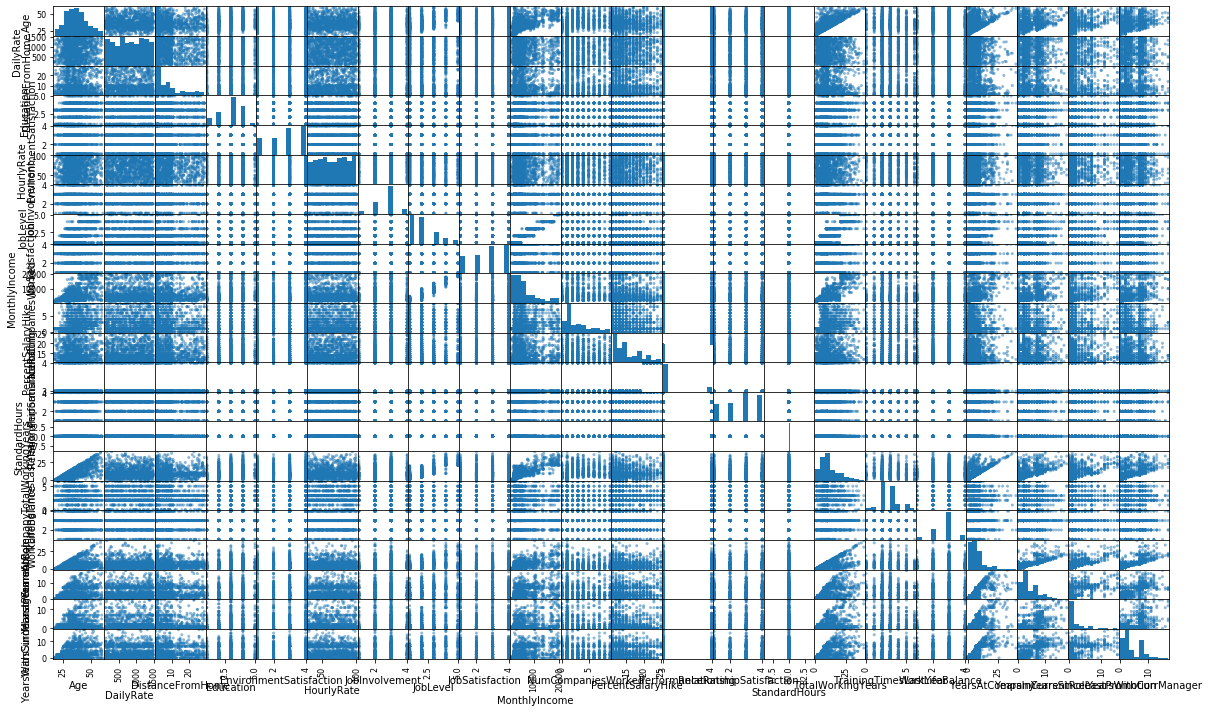

In [117]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(X_train), figsize =(20,12))

In [119]:
X_train_new = pd.DataFrame(X_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252E62B0848>,
      dtype=object)

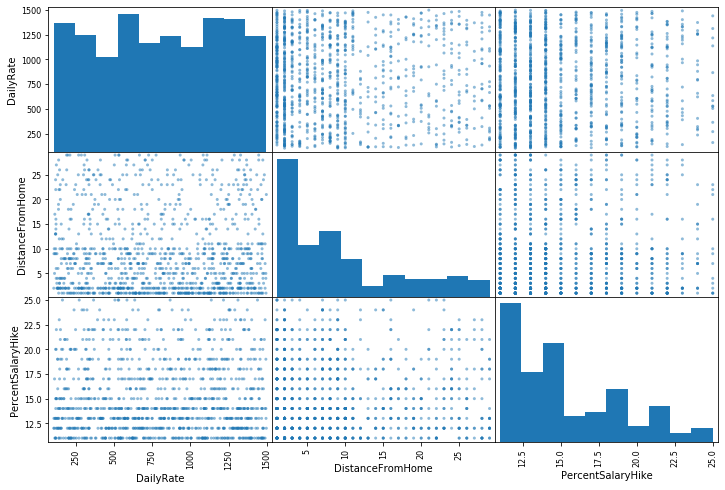

In [124]:
attributes = ['DailyRate', 'DistanceFromHome', 'PercentSalaryHike']
scatter_matrix(X_train_new[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252BCD58B08>]],
      dtype=object)

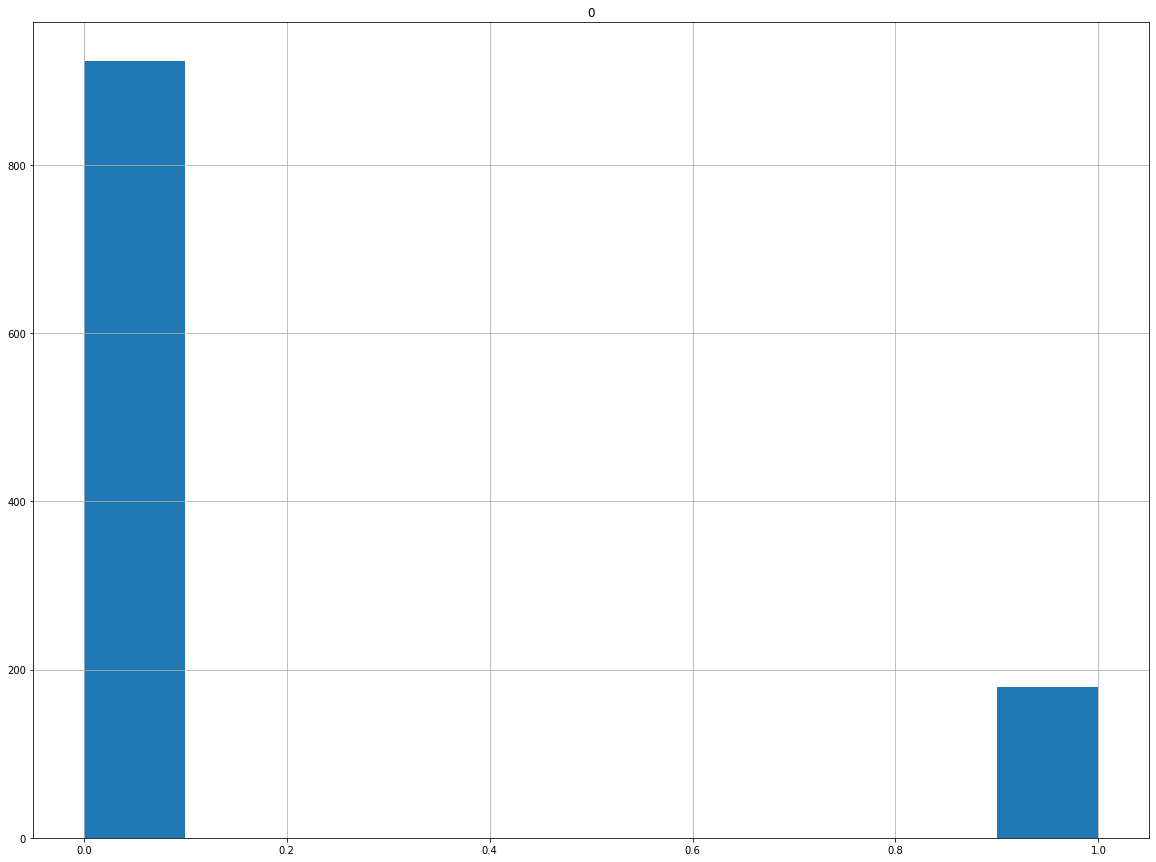

In [108]:
pd.DataFrame(y_train).hist(figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252B67CD848>,
      dtype=object)

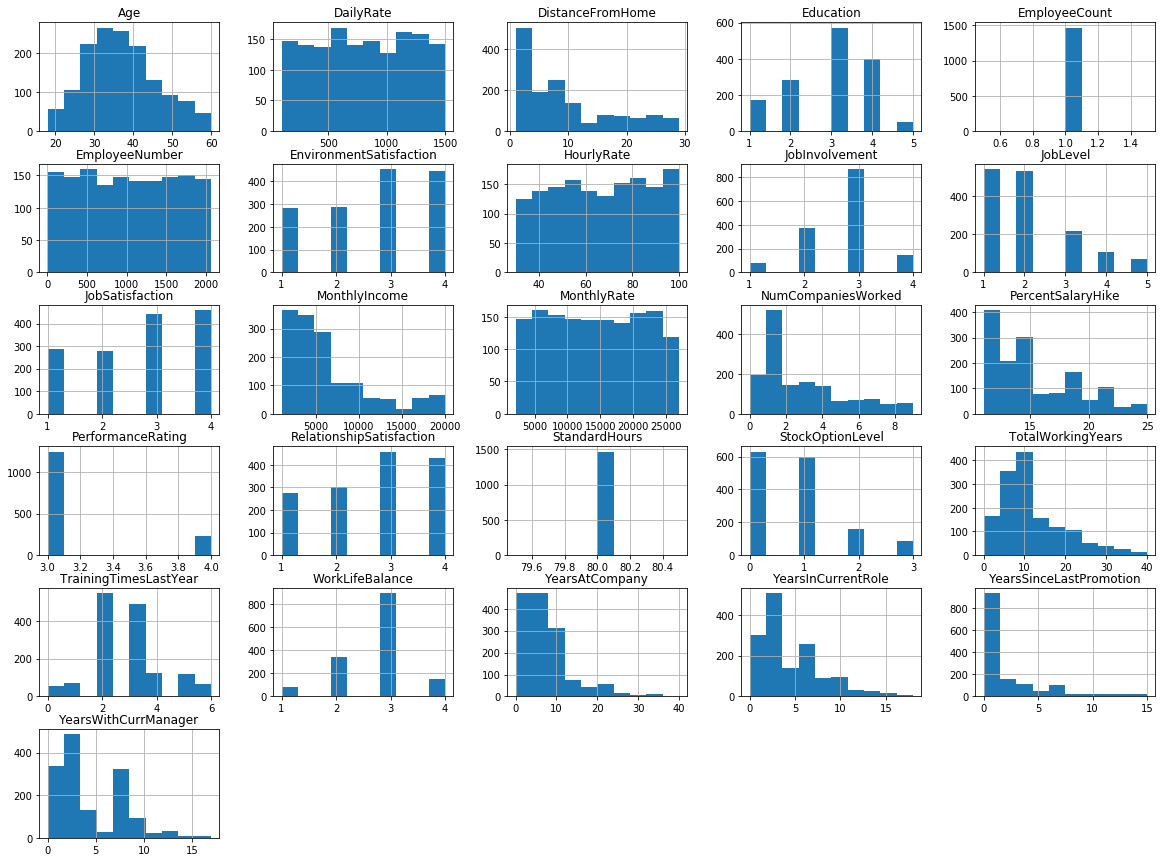

In [42]:
employee_data.hist(figsize = (20, 15))
#this is looking at the raw data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252E9139C48>,
      dtype=object)

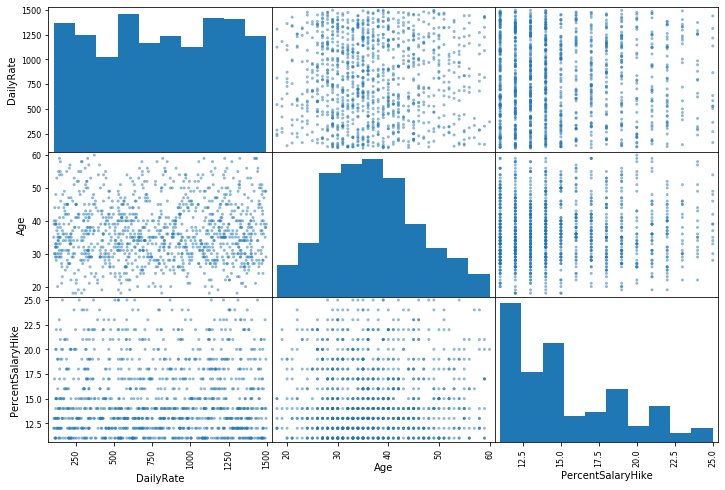

In [138]:
attributes = ['DailyRate', 'Age', 'PercentSalaryHike']
scatter_matrix(X_train_new[attributes], figsize=(12, 8))

In [38]:
employee_data.describe()a
#this is looking at raw data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


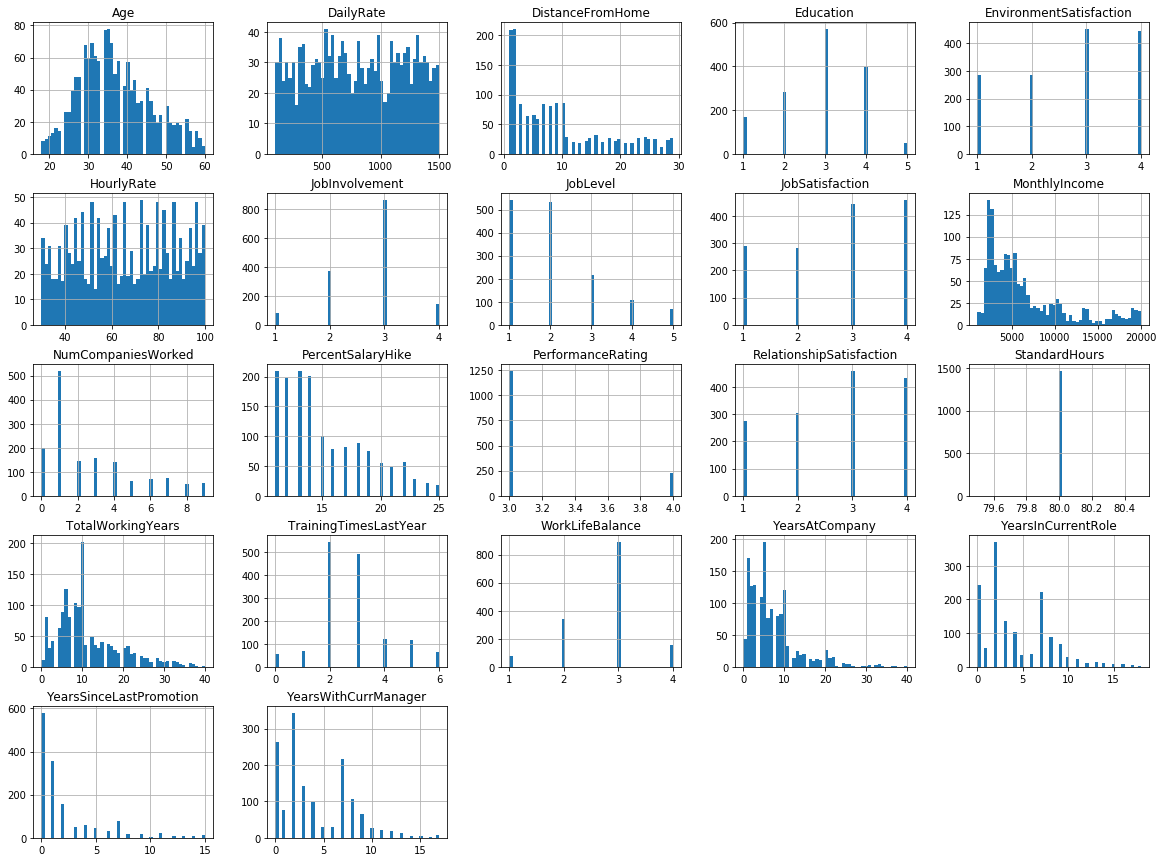

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt 
X.hist(bins=50, figsize=(20,15)) 
plt.show()

In [52]:
X_train_dropped = X_train.drop(['Department', 'Gender','JobRole', 'MaritalStatus'], axis = 1)


In [ ]:
# Step 6: Apply transformations to your data. In your Jupetyr notebook apply, squaring, cubing, logarithmic, and exponentials transformations to two features in your dataset. Plot the histograms and scatter matrices of the resultant data.

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_X = pd.DataFrame(scaler.fit_transform(X_train_dropped),columns = X_train_dropped.columns)
scaled_X.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,...,1.102000e+03,1.102000e+03,1102.0,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03
mean,2.790166e-16,-1.130372e-16,3.779241e-17,1.740894e-16,2.309103e-16,9.329097e-17,-3.167460e-16,1.765073e-16,1.648208e-16,6.598876e-17,...,-3.573467e-16,-9.047008e-17,0.0,1.047823e-16,-9.651485e-17,2.514625e-16,1.229104e-17,1.382238e-16,1.007462e-17,-1.132387e-16
std,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,...,1.000454e+00,1.000454e+00,0.0,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00
min,-2.086774e+00,-1.719137e+00,-1.003241e+00,-1.923489e+00,-1.594415e+00,-1.730160e+00,-2.410134e+00,-9.585000e-01,-1.582699e+00,-1.159018e+00,...,-4.196355e-01,-1.567659e+00,0.0,-1.443804e+00,-2.209679e+00,-2.468326e+00,-1.142043e+00,-1.154871e+00,-6.774910e-01,-1.152015e+00
25%,-7.564215e-01,-8.389751e-01,-8.795341e-01,-9.269279e-01,-6.830843e-01,-8.468675e-01,-1.015193e+00,-9.585000e-01,-6.695398e-01,-7.604328e-01,...,-4.196355e-01,-6.448169e-01,0.0,-6.685537e-01,-6.134376e-01,-1.067659e+00,-6.501089e-01,-6.022578e-01,-6.774910e-01,-5.852646e-01
50%,-9.124542e-02,9.270210e-03,-2.609977e-01,6.963264e-02,2.282461e-01,-1.264646e-02,3.797481e-01,-5.338689e-02,2.436197e-01,-3.452174e-01,...,-4.196355e-01,2.780250e-01,0.0,-1.517202e-01,1.846831e-01,3.330079e-01,-3.221528e-01,-3.259514e-01,-3.647155e-01,-3.018896e-01
75%,6.570777e-01,8.783841e-01,6.049533e-01,1.066193e+00,1.139576e+00,8.706464e-01,3.797481e-01,8.517262e-01,1.156779e+00,4.044475e-01,...,-4.196355e-01,1.200867e+00,0.0,4.943217e-01,1.846831e-01,3.330079e-01,3.337593e-01,7.792745e-01,1.826416e-01,8.316106e-01
max,2.569459e+00,1.703306e+00,2.460562e+00,2.062754e+00,1.139576e+00,1.704867e+00,1.774689e+00,2.661952e+00,1.156779e+00,2.863910e+00,...,2.383021e+00,1.200867e+00,0.0,3.724531e+00,2.579045e+00,1.733675e+00,5.417078e+00,3.818646e+00,4.014141e+00,3.665361e+00


In [70]:
# Apply binning to the housing_median_age value in the California Housing dataset that we looked at last class
# Plot both the original data and the binned data using matplotlib

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X['HourlyRate'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 30.,  37.,  44.,  51.,  58.,  65.,  72.,  79.,  86.,  93., 100.])]


In [72]:
binned = kb.transform(X['HourlyRate'].values.reshape(-1, 1))
binned

<4410x10 sparse matrix of type '<class 'numpy.float64'>'
	with 4410 stored elements in Compressed Sparse Row format>

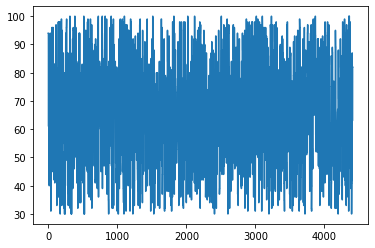

In [73]:
import matplotlib.pyplot as plt
plt.plot(X['HourlyRate'].values.reshape(-1, 1))
plt.show()

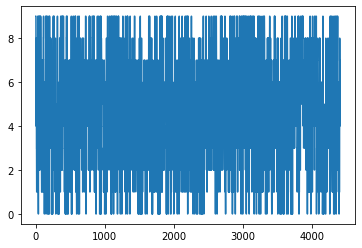

In [74]:
plt.plot(binned.argmax(1))
plt.show()

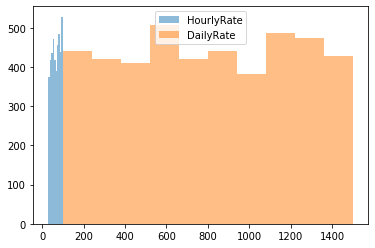

In [81]:
plt.hist(X['HourlyRate'].values.reshape(-1, 1), label="HourlyRate", alpha=.5, bins=10)
plt.hist(X['DailyRate'].values.reshape(-1, 1), label="DailyRate", alpha=.5, bins=10)
plt.legend()

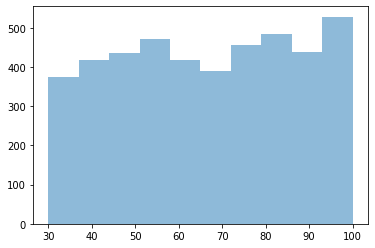

In [125]:
plt.hist(X['HourlyRate'].values.reshape(-1, 1), label="HourlyRate", alpha=.5, bins=10)
plt.show()

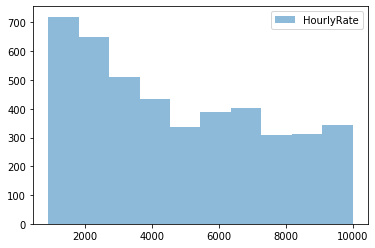

In [126]:
plt.hist(X['HourlyRate'].values.reshape(-1, 1)**2, label="HourlyRate", alpha=.5, bins=10)
plt.legend()

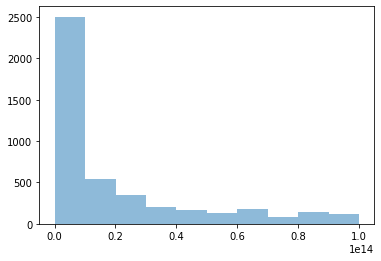

In [129]:
plt.hist(X['HourlyRate'].values.reshape(-1, 1)**7, label="HourlyRate", alpha=.5, bins=10)
plt.show()

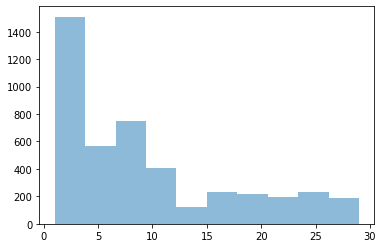

In [131]:
plt.hist(X['DistanceFromHome'].values.reshape(-1, 1), label="DailyRate", alpha=.5, bins=10)
plt.show()

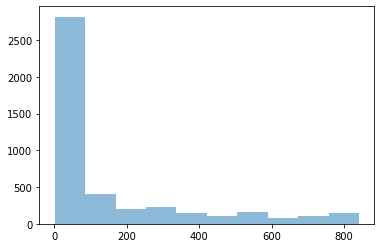

In [132]:
plt.hist(X['DistanceFromHome'].values.reshape(-1, 1)**2, label="DailyRate", alpha=.5, bins=10)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252E6D6FD08>,
      dtype=object)

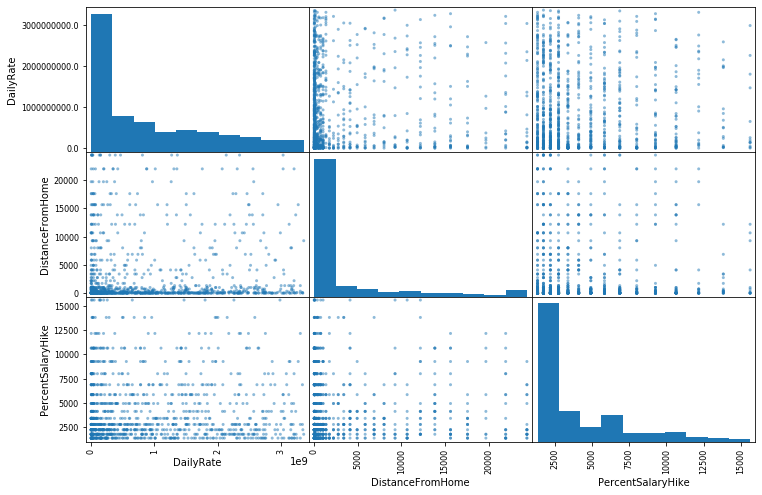

In [133]:
attributes = ['DailyRate', 'DistanceFromHome', 'PercentSalaryHike']
scatter_matrix(X_train_new[attributes]**3, figsize=(12, 8))

C:\Users\sarah\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 4.382026634673881 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\sarah\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 4.382026634673881 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\sarah\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 4.382026634673881 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252E874D688>,
      dtype=object)

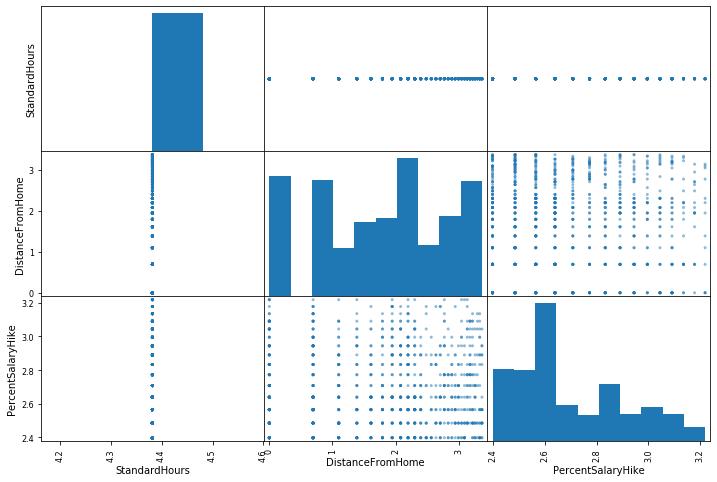

In [136]:
import numpy as np
attributes = ['StandardHours', 'DistanceFromHome', 'PercentSalaryHike']
scatter_matrix(np.log(X_train_new[attributes]), figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252E9D1DD88>,
      dtype=object)

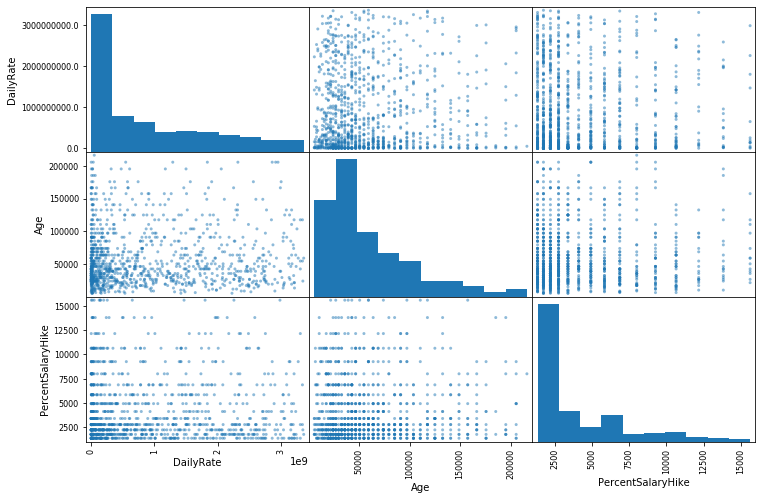

In [140]:
attributes = ['DailyRate', 'Age', 'PercentSalaryHike']
scatter_matrix(X_train_new[attributes]**3, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252EA207A88>,
      dtype=object)

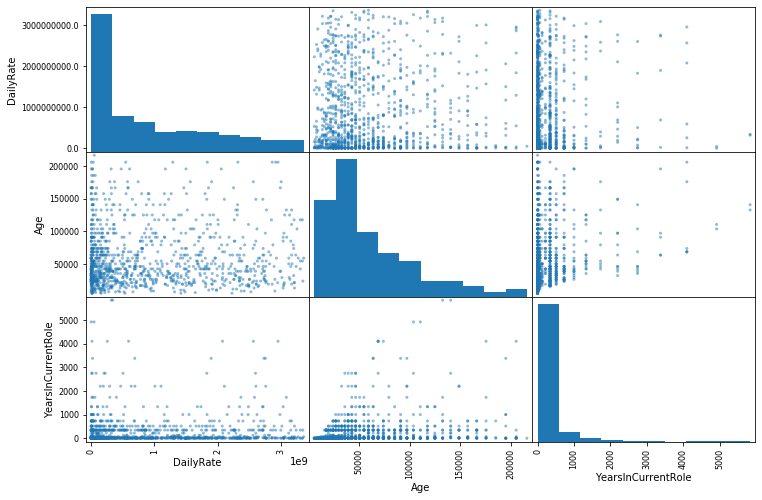

In [141]:
attributes = ['DailyRate', 'Age', 'YearsInCurrentRole']
scatter_matrix(X_train_new[attributes]**3, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252EA4E0148>,
      dtype=object)

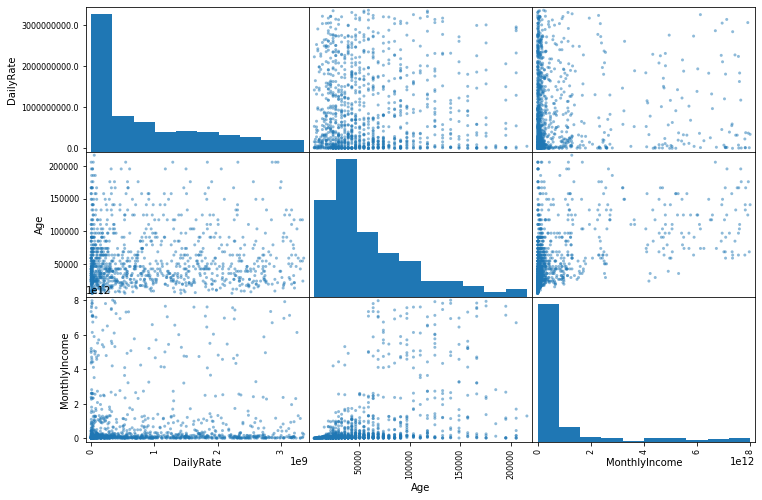

In [142]:
attributes = ['DailyRate', 'Age', 'MonthlyIncome']
scatter_matrix(X_train_new[attributes]**3, figsize=(12, 8))

#age and daily rate seem most connected 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252B7F49B08>]],
      dtype=object)

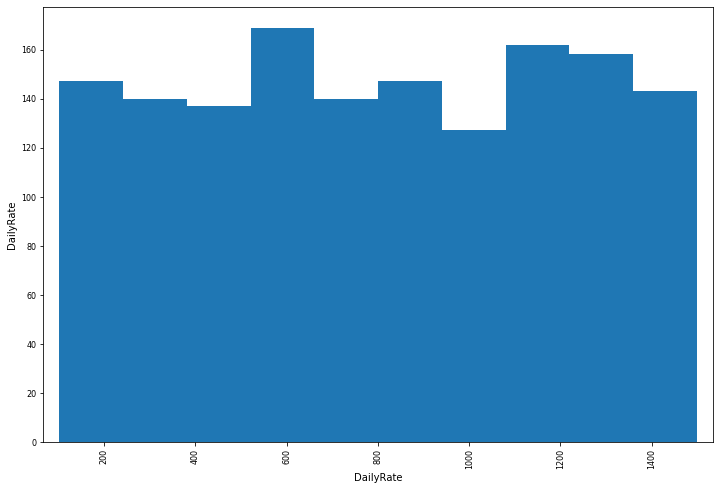

In [87]:
#import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
#attributes = ["Attrition", "DailyRate"]
#scatter_matrix(employee_data[attributes], figsize=(12, 8))

In [89]:
scatter_matrix(employee_data[attributes]**2, figsize=(12, 8))

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [54]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X_train_dropped)
X_train_dropped_poly = poly.transform(X_train_dropped)

MemoryError: 

In [ ]:
# PROJECT 2
# features = employee_data_dummies[['Attrition','Department', 'Gender', 'JobRole', 'MaritalStatus']]
#features = employee_data_dummies.loc[10:12]

# Extract NumPy arrays
X = features.values
y = X_dummies['Attrition'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))